<a href="https://colab.research.google.com/github/JamshedAli18/-Energy-Consumption-Regression/blob/main/Energy_Consumption_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/ENB2012_data.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
df.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


In [6]:
x = df.drop(['Y1','Y2'],axis=1)

In [7]:
y1 = df['Y1']
y2 = df['Y2']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [16]:
model_y1 = LinearRegression()

In [17]:
model_y1.fit(X_train,y1_train)

LinearRegression()

In [18]:
model_y2 = LinearRegression()

In [20]:
model_y2.fit(X_train,y2_train)

LinearRegression()

In [21]:
y1_pred = model_y1.predict(X_test)
y2_pred = model_y2.predict(X_test)

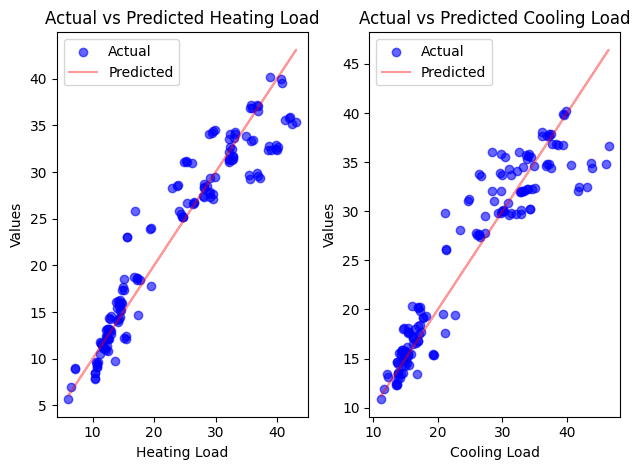

In [42]:
plt.subplot(1, 2, 1)
plt.scatter(y1_test, y1_pred, color='blue', label='Actual', alpha=0.6)
plt.plot(y1_test, y1_test, color='red', label='Predicted', alpha=0.4)
plt.xlabel('Heating Load')
plt.ylabel('Values')
plt.title('Actual vs Predicted Heating Load')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y2_test, y2_pred, color='blue', label='Actual', alpha=0.6)
plt.plot(y2_test, y2_test, color='red', label='Predicted', alpha=0.4)
plt.xlabel('Cooling Load')
plt.ylabel('Values')
plt.title('Actual vs Predicted Cooling Load')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8
661,0.66,759.5,318.5,220.50,3.5,3,0.4,3
122,0.74,686.0,245.0,220.50,3.5,4,0.1,2
113,0.79,637.0,343.0,147.00,7.0,3,0.1,2
14,0.82,612.5,318.5,147.00,7.0,4,0.0,0
529,0.98,514.5,294.0,110.25,7.0,3,0.4,1


In [30]:
y1_test.head()

,Y1
661,15.18
122,10.32
113,37.26
14,16.95
529,32.26


In [31]:
model.predict([[0.66,	759.5,	318.5,	220.50,	3.5,	3,	0.4,	3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.36855838])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
Mae = mean_absolute_error(y1_test,y1_pred)
Mse = mean_squared_error(y1_test,y1_pred)
r2 = r2_score(y1_test,y1_pred)

In [37]:
Mae

2.2224176833449096

In [38]:
Mse

10.126045523855545

In [39]:
r2

0.9083003944744673